# Simulated Method of Moments Estimation (MACS 30100 and 40200)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), January 2017
The code in this Jupyter notebook was written using Python 3.5. It also uses data file `Econ381totpts.txt` and the image file `MLEplots.png`. For the code to run properly, you should have the data file and the image fil in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data.

## 1. The SMM estimator
Simulated method of moments (SMM) is analogous to the generalized method of moments (GMM) estimator. SMM could really be thought of as a particular type of GMM estimator. The SMM estimator chooses model parameters $\theta$ to make simulated model moments match data moments. Seminal papers developing SMM are McFadden (1989), Lee and Ingram (1991), and Duffie and Singleton (1993). Good textbook treatments of SMM are found in Adda and Cooper (2003, pp. 87-100) and Davidson and MacKinnon (2004, pp. 383-394).

In ML estimation, we used data $x$ and model parameters $\theta$ to maximize the likelihood of drawing that data $x$ from the model given parameters $\theta$.

$$ \hat{\theta}_{ML} = \theta:\quad \max_{\theta}\ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr) $$

In GMM estimation, we used data $x$ and model parameters $\theta$ to minimize the distance between model moments $m(x|\theta)$ and data moments $m(x)$.

$$ \hat{\theta}_{GMM} = \theta:\quad \min_{\theta}||m(x|\theta) - m(x)|| $$

The following difficulties can arise with GMM making it not possible or very difficult.

* The model moment function $m(x|\theta)$ is not known analytically.
* The model moments $m(x|\theta)$ are derived from *latent variables* that are not observed by the modeler. See Laroque and Salanie (1993).
* The model moments $m(x|\theta)$ are derived from *censored variables* that are only partially observed by the modeler.
* The model moments $m(x|\theta)$ are just difficult to derive analytically. Examples include moments that include multiple integrals over nonlinear functions as in McFadden (1989).

SMM estimation is simply to simulate the model data $S$ times, and use the average values of the moments from the simulated data as the estimator for the model moments. Let $\tilde{x}=\{\tilde{x}_1,\tilde{x}_2,...\tilde{x}_s,...\tilde{x}_S\}$ be the $S$ simulations of the model data.  

$$ \hat{m}\left(\tilde{x}|\theta\right) = \frac{1}{S}\sum_{s=1}^S m\left(\tilde{x}_s|\theta\right) $$

Once we have an estimate of the model moments $\hat{m}\left(\tilde{x}|\theta\right)$ from our $S$ simulations, SMM estimation is very similar to our presentation of GMM. The SMM approach of estimating the parameter vector $\hat{\theta}_{SMM}$ is to choose $\theta$ to minimize some distance measure of the data moments $m(x)$ from the simulated model moments $\hat{m}(\tilde{x}|\theta)$.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\: ||\hat{m}(\tilde{x}|\theta)-m(x)|| $$

The distance measure $||\hat{m}(\tilde{x}|\theta)-m(x)||$ can be any kind of norm. But it is important to recognize that your estimates $\hat{\theta}_{SMM}$ will be dependent on what distance measure (norm) you choose. The most widely studied and used distance metric in GMM and SMM estimation is the $L^2$ norm or the sum of squared errors in moments. Define the moment error function $e(\tilde{x},x|\theta)$ as the percent difference in the vector of simulated model moments from the data moments.

$$ e(\tilde{x},x|\theta) \equiv \frac{\hat{m}(\tilde{x}|\theta)-m(x)}{m(x)} $$

It is important that the error function $e(\tilde{x},x|\theta)$ be a percent deviation of the moments (given that none of the data moments are 0). This puts all the moments in the same units, which helps make sure that no moments receive unintended weighting simply due to its units. This ensures that the problem is scaled properly and will suffer from as little as possible ill conditioning.

In this case, the SMM estimator is the following,

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, W \, e(\tilde{x},x|\theta) $$

where $W$ is a $R\times R$ weighting matrix in the criterion function. For now, think of this weighting matrix as the identity matrix. But we will show in Section 2 a more optimal weighting matrix. We call the quadratic form expression $e(\tilde{x},x|\theta)^T \, W \, e(\tilde{x},x|\theta)$ the *criterion function* because it is a strictly positive scalar that is the object of the minimization in the SMM problem statement. The $R\times R$ weighting matrix $W$ in the criterion function allows the econometrician to control how each moment is weighted in the minimization problem. For example, an $R\times R$ identity matrix for $W$ would give each moment equal weighting, and the criterion function would be a simply sum of squared percent deviations (errors). Other weighting strategies can be dictated by the nature of the problem or model.

One last item to emphasize with SMM, which we will highlight in the examples in this notebook, is that the errors that are drawn for the $S$ simulations of the model must be drawn only once so that the minimization problem for $\hat{\theta}_{SMM}$ does not have the underlying sampling changing for each guess of a value of $\theta$. Put more simply, you want the random draws for all the simulations to be held constant so that the only thing changing in the minimization problem is the value of the vector of parameters $\theta$.

## 2. The Weighting Matrix (W)
In the SMM criterion function in the problem statement above, some weighting matrices $W$ produce precise estimates while others produce poor estimates with large variances. We want to choose the optimal weighting matrix $W$ with the smallest possible asymptotic variance. This is an efficient or optimal SMM estimator. The optimal weighting matrix is the inverse variance covariance matrix of the moments at the optimal moments,

$$ W^{opt} \equiv \Omega^{-1}(\tilde{x},x|\hat{\theta}_{SMM}) $$

where $\Omega(\tilde{x},x|\theta)$ is the variance covariance matrix of the moment condition errors $e(\tilde{x},x|\theta)$. The intuition for using the inverse variance covariance matrix $\Omega^{-1}$ as the optimal weighting matrix is the following. You want to downweight moments that have a high variance, and you want to weight more heavily the moments that are generated more precisely.

Notice that this definition of the optimal weighting matrix is circular. $W^{opt}$ is a function of the SMM estimates $\hat{\theta}_{SMM}$, but the optimal weighting matrix is used in the estimation of $\hat{\theta}_{SMM}$. This means that one has to use some kind of iterative fixed point method to find the true optimal weighting matrix $W^{opt}$. Below are some examples of weighting matrices to use.

### 2.1. The identity matrix (W = I)
Many times, you can get away with just using the identity matrix as your weighting matrix $W = I$. This changes the criterion function to a simple sum of squared error functions such that each moment has the same weight.

$$ \hat{\theta}_{SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, e(\tilde{x},x|\theta) $$

If the problem is well conditioned and well identified, then your SMM estimates $\hat{\theta}_{SMM}$ will not be greatly affected by this simplest of weighting matrices.

### 2.2. Two-step variance covariance estimator of W
The most common method of estimating the optimal weighting matrix for SMM estimates is the two-step variance covariance estimator. The name "two-step" refers to the two steps used to get the weighting matrix.

The first step is to estimate the SMM parameter vector $\hat{\theta}_{1,SMM}$ using the simple identity matrix as the weighting matrix $W = I$.

$$ \hat{\theta}_{1,SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, I \, e(\tilde{x},x|\theta) $$

You then use the vector of moment error functions from thet Step 1 SMM estimate $e(\tilde{x},x|\hat{\theta}_{1,SMM})$ to get a new estimate of the variance covariance matrix of the moment error vector.

$$ \hat{\Omega}_2 = \frac{1}{N}e(\tilde{x},x|\hat{\theta}_{1,SMM})\,e(\tilde{x},x|\hat{\theta}_{1,SMM})^T $$

The optimal weighting matrix is the inverse of the two-step variance covariance matrix.

$$ \hat{W}^{two-step} \equiv \hat{\Omega}_2^{-1} $$

Lastly, re-estimate the SMM estimator using the optimal two-step weighting matrix.

$$ \hat{\theta}_{2, SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, \hat{W}^{two-step} \, e(\tilde{x},x|\theta) $$

$\hat{\theta}_{2, SMM}$ is called the two-step SMM estimator.

### 2.3. Iterated variance covariance estimator of W
The truly optimal weighting matrix $W^{opt}$ is the iterated variance-covariance estimator of $W$. This procedure is to just repeat the process described in the two-step SMM estimator until the estimated weighting matrix no longer changes between iterations. Let $i$ index the $i$th iterated SMM estimator,

$$ \hat{\theta}_{i,SMM}=\theta:\quad \min_{\theta}\:e(\tilde{x},x|\theta)^T \, \hat{W}_{i} \, e(\tilde{x},x|\theta) $$

and the $i+1$th estimate of the optimal weighting matrix is defined as the following.

$$ \hat{W}_{i+1} \equiv \hat{\Omega}_{i+1} = \frac{1}{N}e(\tilde{x},x|\hat{\theta}_{i,SMM})\,e(\tilde{x},x|\hat{\theta}_{i,SMM})^T $$

The iterated SMM estimator is the $\hat{\theta}_{i,SMM}$ such that $\hat{W}_{i+1}$ is very close to $\hat{W}_{i}$ for some distance metric (norm).

$$ \hat{\theta}_{it,SMM} = \hat{\theta}_{i,SMM}: \quad || \hat{W}_{i+1} - \hat{W}_{i} || < \varepsilon $$

### 2.4. Newey-West consistent estimator of $\Omega$ and W
The Newey-West estimator of the optimal weighting matrix and variance covariance matrix is consistent in the presence of heteroskedasticity and autocorrelation in the data (See Newey and West, 1987). Adda and Cooper (2003, p. 82, 89) have a nice exposition of how to compute the Newey-West weighting matrix $\hat{W}_{nw}$ in the SMM case. See also Davidson and MacKinnon (2004, p. 364). The asymptotic representation of the optimal weighting matrix $\hat{W}^{opt}$ is the following:

$$ \hat{W}^{opt} = \lim_{N\rightarrow\infty}\frac{1}{N}\sum_{i=1}^N \sum_{l=-\infty}^\infty e(x_i|\theta)e(x_{i-l}|\theta)^T $$

The Newey-West consistend estimator of $\hat{W}^{opt}$ is:

$$ \hat{W}_{nw} = \Gamma_{0,N} + \frac{1}{N}\frac{1}{S}\sum_{i=1}^N \sum_{s=1}^S \left[m\left(\tilde{x}^s_i|\hat{\theta}_{SMM}\right) - \frac{1}{L}\sum_{l=1}^L m\left(\tilde{x}^l_i|\hat{\theta}_{SMM}\right)\right]\cdot\left[m\left(\tilde{x}^s_i|\hat{\theta}_{SMM}\right) - \frac{1}{L}\sum_{l=1}^L m\left(\tilde{x}^l_i|\hat{\theta}_{SMM}\right)\right]^T $$

where

$$ \Gamma_{v,N} = \frac{1}{N}\sum_{i=v+1}^N e(x_i|\theta)e(x_{i-v}|\theta)^T $$

Of course, for autocorrelation, the subscript $i$ and the sample size $N$ can be changed to $t$ and $T$, respectively.

## 3. Examples
In this section, we will use SMM to estimate parameters of the models from the [maximum likelihood notebook](https://github.com/rickecon/StructEst_W17/blob/master/Notebooks/MLE/MLest.ipynb) and from the [GMM notebook](https://github.com/rickecon/StructEst_W17/blob/master/Notebooks/GMM/GMMest.ipynb).

### 3.1. Fitting a truncated normal to intermediate macroeconomics test scores
Let's revisit the problem from the ML and GMM notebooks of fitting a truncated normal distribution to intermediate macroeconomics test scores. The data are in the text file `Econ381totpts.txt`. Recall that these test scores are between 0 and 450. The figure below shows a histogram of the data, as well as three truncated normal PDF's. The black line is the ML estimate of $\mu$ and $\sigma$ of the truncated normal pdf. The red and the green lines are just the PDF's of two "arbitrarily" chosen combinations of the truncated normal parameters $\mu$ and $\sigma$.

![title](MLEplots.png)

Let's try estimating the parameters $\mu$ and $\sigma$ from the truncated normal distribution by SMM. What moments should we use? Let's try the mean and variance of the data. These two statistics of the data are defined by:

$$ mean(scores_i) = \frac{1}{N}\sum_{i=1}^N scores_i $$

$$ var(scores_i) = \frac{1}{N-1}\sum_{i=1}^{N} \left(scores_i - mean(scores_i)\right)^2 $$

So the data moment vector $m(x)$ for SMM is the following.

$$ m(scores_i) \equiv \begin{bmatrix} mean(scores_i) \\ var(scores_i) \end{bmatrix} $$

And the model moment vector $m(x|\theta)$ for GMM is the following.

$$ m(scores_i|\mu,\sigma) \equiv \begin{bmatrix} mean(scores_i|\mu,\sigma) \\ var(scores_i|\mu,\sigma) \end{bmatrix} $$

But let's assume that we need to simulate the data from the model (test scores) $S$ times in order to get the model moments. In this case, we don't need to simulate. But we will do so to show how SMM works.

What would one simulation (the $s$th simulation) of the test scores look like? There are 161 test score observations in the data file `Econ381totpts.txt`. So one simulation (the $s$th simulation) would be a draw of 161 test scores from a truncated normal distribution with parameters $\mu$, $\sigma$, and $cutoff=450$.

In [1]:
# Import packages and load the data
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

pts = np.loadtxt('Econ381totpts.txt')
# pts

Let random variable $y\sim N(\mu,\sigma)$ be distributed normally with mean $\mu$ and standard deviation $\sigma$ with PDF given by $\phi(y|\mu,\sigma)$ and CDF given by $\Phi(y|\mu,\sigma)$. The truncated normal distribution of random variable $x\in(a,b)$ based on $y$ but with cutoff values of $a\geq -\infty$ as a lower bound and $a < b\leq\infty$ as an upper bound has the following probability density function.

$$ f(x|\mu,\sigma,a,b) = \begin{cases} 0 \quad\text{if}\quad x\leq a \\ \frac{\phi(x|\mu,\sigma)}{\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)}\quad\text{if}\quad a < x < b \\ 0 \quad\text{if}\quad x\geq b \end{cases} $$

The CDF of the truncated normal can be shown to be the following:

$$ F(x|\mu,\sigma,a,b) = \begin{cases} 0 \quad\text{if}\quad x\leq a \\ \frac{\Phi(x|\mu,\sigma) - \Phi(a|\mu,\sigma)}{\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)}\quad\text{if}\quad a < x < b \\ 0 \quad\text{if}\quad x\geq b \end{cases} $$

The inverse CDF of the truncated normal takes a value $p$ between 0 and 1 and solves for the value of $x$ for which $p=F(x|\mu,\sigma,a,b)$. The expression for the inverse CDF of the truncated normal is the following:

$$ x = \Phi^{-1}(z|\mu,\sigma) \quad\text{where}\quad z = p\Bigl[\Phi(b|\mu,\sigma) - \Phi(a|\mu,\sigma)\Bigr] + \Phi(a|\mu,\sigma) $$

Note that $z$ is just a transformation of $p$ such that $z\sim U\Bigl(\Phi^{-1}(a|\mu,\sigma), \Phi^{-1}(b|\mu,\sigma)\Bigr)$.

In [2]:
# Define function that gives PDF values from truncated normal distribution
def trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Generate PDF values from a truncated normal distribution based on a
    normal distribution with mean mu and standard deviation sigma and
    cutoffs (cut_lb, cut_ub).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N, S) matrix, (N,) vector, or scalar in (cut_lb, cut_ub),
             value(s) in the support of s~TN(mu, sig, cut_lb, cut_ub)
    mu     = scalar, mean of the nontruncated normal distribution from
             which the truncated normal is derived
    sigma  = scalar > 0, standard deviation of the nontruncated normal
             distribution from which the truncated normal is derived
    cut_lb = scalar or string, ='None' if no lower bound cutoff is
             given, otherwise is scalar lower bound value of
             distribution. Values below this cutoff have zero
             probability
    cut_ub = scalar or string, ='None' if no upper bound cutoff is given
             given, otherwise is scalar lower bound value of
             distribution. Values below this cutoff have zero
             probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        scipy.stats.norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    cut_ub_cdf = scalar in [0, 1], cdf of N(mu, sigma) at upper bound
                 cutoff of truncated normal distribution
    cut_lb_cdf = scalar in [0, 1], cdf of N(mu, sigma) at lower bound
                 cutoff of truncated normal distribution
    unif2_vals = (N, S) matrix, (N,) vector, or scalar in (0,1),
                 rescaled uniform derived from original.
    pdf_vals   = (N, S) matrix, (N,) vector, or scalar in (0,1), PDF
                 values corresponding to xvals from truncated normal PDF
                 with base normal normal distribution N(mu, sigma) and
                 cutoffs (cut_lb, cut_ub)
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    # No cutoffs: truncated normal = normal
    if (cut_lb == None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = 0.0
    # Lower bound truncation, no upper bound truncation
    elif (cut_lb != None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    # Upper bound truncation, no lower bound truncation
    elif (cut_lb == None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = 0.0
    # Lower bound and upper bound truncation
    elif (cut_lb != None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    
    pdf_vals = (sts.norm.pdf(xvals, loc=mu, scale=sigma) /
                (cut_ub_cdf - cut_lb_cdf))
    
    return pdf_vals

In [4]:
# Define function that draws N x S test score values from a truncated
# normal distribution
def trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Draw (N x S) matrix of random draws from a truncated normal
    distribution based on a normal distribution with mean mu and
    standard deviation sigma and cutoffs (cut_lb, cut_ub). These draws
    correspond to an (N x S) matrix of randomly generated draws from a
    uniform distribution U(0,1).
    --------------------------------------------------------------------
    INPUTS:
    unif_vals = (N, S) matrix, (N,) vector, or scalar in (0,1), random
                draws from uniform U(0,1) distribution
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        scipy.stats.norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    cut_ub_cdf  = scalar in [0, 1], cdf of N(mu, sigma) at upper bound
                  cutoff of truncated normal distribution
    cut_lb_cdf  = scalar in [0, 1], cdf of N(mu, sigma) at lower bound
                  cutoff of truncated normal distribution
    unif2_vals  = (N, S) matrix, (N,) vector, or scalar in (0,1),
                  rescaled uniform derived from original.
    tnorm_draws = (N, S) matrix, (N,) vector, or scalar in (0,1),
                  values drawn from truncated normal PDF with base
                  normal distribution N(mu, sigma) and cutoffs
                  (cut_lb, cut_ub)
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: tnorm_draws
    --------------------------------------------------------------------
    '''
    # No cutoffs: truncated normal = normal
    if (cut_lb == None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = 0.0
    # Lower bound truncation, no upper bound truncation
    elif (cut_lb != None) & (cut_ub == None):
        cut_ub_cdf = 1.0
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    # Upper bound truncation, no lower bound truncation
    elif (cut_lb == None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = 0.0
    # Lower bound and upper bound truncation
    elif (cut_lb != None) & (cut_ub != None):
        cut_ub_cdf = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
        cut_lb_cdf = sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    
    unif2_vals = unif_vals * (cut_ub_cdf - cut_lb_cdf) + cut_lb_cdf
    tnorm_draws = sts.norm.ppf(unif2_vals, loc=mu, scale=sigma)
    
    return tnorm_draws

What would one simulation of 161 test scores look like from a truncated normal with mean $\mu=300$, $\sigma=30$?

Mean score = 295.95182876
Variance of scores = 813.176137192
Standard deviation of scores = 28.516243392


<IPython.core.display.Javascript object>


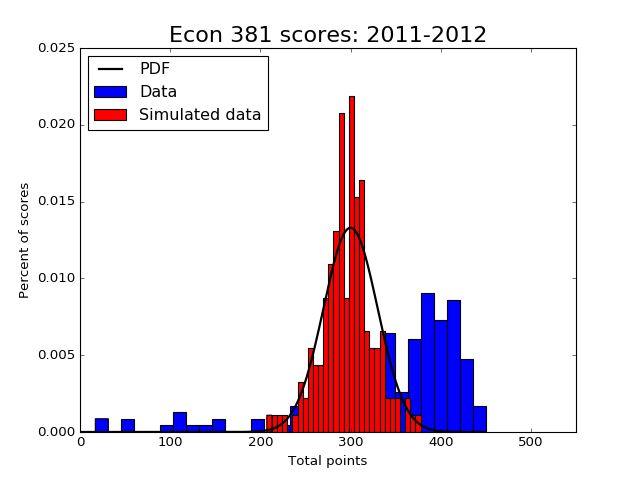

In [5]:
mu_1 = 300.0
sig_1 = 30.0
cut_lb_1 = 0.0
cut_ub_1 = 450.0
unif_vals_1 = sts.uniform.rvs(0, 1, size=161)
draws_1 = trunc_norm_draws(unif_vals_1, mu_1, sig_1,
                           cut_lb_1, cut_ub_1)
print('Mean score =', draws_1.mean())
print('Variance of scores =', draws_1.var())
print('Standard deviation of scores =', draws_1.std())

# Plot data histogram vs. simulated data histogram
count_d, bins_d, ignored_d = \
    plt.hist(pts, 30, normed=True, color='b', label='Data')
count_m, bins_m, ignored_m = \
    plt.hist(draws_1, 30, normed=True, color='r',
             label='Simulated data')
xvals = np.linspace(0, 450, 500)
plt.plot(xvals, trunc_norm_pdf(xvals, mu_1, sig_1, cut_lb_1, cut_ub_1),
         linewidth=2, color='k', label='PDF')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"
plt.legend(loc='upper left')

From that simulation, we can calculate moments from the simulated data just like we did from the actual data.

In [26]:
def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for SMM
    (mean(data), variance(data)) from both the actual data and from the
    simulated data.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N, S) matrix, (N,) vector, or scalar in (cut_lb, cut_ub),
            test scores data, either real world or simulated. Real world
            data will come in the form (N,). Simulated data comes in the
            form (N,) or (N, S).
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar or (S,) vector, mean value of test scores data
    var_data  = scalar > 0 or (S,) vector, variance of test scores data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        mean_data = xvals.mean()
        var_data = xvals.var()
    elif xvals.ndim == 2:
        mean_data = xvals.mean(axis=0)
        var_data = xvals.var(axis=0)
    
    return mean_data, var_data


In [27]:
mean_data, var_data = data_moments(pts)
print('Data mean =', mean_data)
print('Data variance =', var_data)
mean_sim, var_sim = data_moments(draws_1)
print('Sim. mean =', mean_sim)
print('Sim. variance =', var_sim)

Data mean = 341.908695652
Data variance = 7827.9972924
Sim. mean = 299.491443464
Sim. variance = 982.528614342


We can also simulate many $(S)$ data sets of test scores, each with $N=161$ test scores. The estimate of the model moments will be the average of the simulated data moments across the simulations.

In [28]:
N = 161
S = 100
mu_2 = 300.0
sig_2 = 30.0
cut_lb = 0.0
cut_ub = 450.0
unif_vals_2 = sts.uniform.rvs(0, 1, size=(N, S))
draws_2 = trunc_norm_draws(unif_vals_2, mu_2, sig_2,
                           cut_lb, cut_ub)

mean_sim, var_sim = data_moments(draws_2)
print(mean_sim)
print(var_sim)
mean_mod = mean_sim.mean()
var_mod = var_sim.mean()
print('Estimated model mean =', mean_mod)
print('Estimated model variance =', var_mod)

[ 298.00970076  296.89948753  295.73397883  298.16887319  300.29391686
  298.89799295  301.90942295  302.0066447   302.05177486  301.77834764
  299.00782137  300.03779982  298.3239769   302.12448922  301.61722673
  297.67257633  305.70314371  298.90870821  303.6636997   297.49174465
  299.20189852  295.58779207  297.89011754  296.61755019  297.40598388
  300.09343224  300.75898101  300.13881175  300.51600202  300.51361681
  298.57683905  295.73980972  298.43022062  301.22717204  301.46171852
  300.96870425  300.32871188  303.76449658  304.32138733  299.91511468
  300.8307283   295.87199553  296.97583075  307.12124683  301.66113941
  300.00333608  300.72812781  303.61409239  299.97308873  299.88710898
  301.47648356  305.08505896  303.08641023  305.42619975  298.45949125
  302.23114696  300.52473783  300.30818746  298.60913269  298.83771631
  298.47169817  299.54386402  303.05561117  298.97937575  298.9860643
  302.0268887   302.63406986  298.42726949  304.33668023  299.71142081
  296.8

Our SMM model moments $\hat{m}(\tilde{scores}_i|\mu,\sigma)$ are an estimate of the true models moments that we got in the GMM case by integrating using the PDF of the truncated normal distribution. Our SMM moments we got by simulating the data $S$ times and taking the average of the simulated data moments across the simulations as our estimator of the model moments.

Define the error vector as the vector of percent deviations of the model moments from the data moments.

$$ e(\tilde{scores}_i,scores_i|\mu,\sigma) \equiv \frac{\hat{m}(\tilde{scores}_i|\mu,\sigma) - m(scores_i)}{m(scores_i)} $$

The SMM estimator for this moment vector is the following.

$$ (\hat{\mu}_{SMM},\hat{\sigma}_{SMM}) = (\mu,\sigma):\quad \min_{\mu,\sigma} e(\tilde{scores}_i,scores_i|\mu,\sigma)^T \, W \, e(\tilde{scores}_i,scores_i|\mu,\sigma) $$

Now let's define a criterion function that takes as inputs the parameters and the estimator for the weighting matrix $\hat{W}$.

In [29]:
def err_vec(data_vals, sim_vals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for SMM.
    --------------------------------------------------------------------
    INPUTS:
    data_vals = (N,) vector, test scores data
    sim_vals  = (N, S) matrix, S simulations of test scores data
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, estimated mean value from model
    var_model  = scalar > 0, estimated variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, var_data = data_moments(data_vals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_sim, var_sim = data_moments(sim_vals)
    mean_model = mean_sim.mean()
    var_model = var_sim.mean()
    moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the SMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params    = (2,) vector, ([mu, sigma])
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    args      = length 5 tuple,
                (xvals, unif_vals, cut_lb, cut_ub, W_hat)
    xvals     = (N,) vector, values of the truncated normally
                distributed random variable
    unif_vals = (N, S) matrix, matrix of draws from U(0,1) distribution.
                This fixes the seed of the draws for the simulations
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    W_hat     = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, unif_vals, cut_lb, cut_ub, W_hat = args
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    err = err_vec(xvals, sim_vals, mu, sigma, cut_lb, cut_ub,
                  simple=False)
    crit_val = np.dot(np.dot(err.T, W_hat), err) 
    
    return crit_val

In [31]:
mu_test = 550
sig_test = 176
cut_lb = 0.0
cut_ub = 450.0
unif_vals_2 = sts.uniform.rvs(0, 1, size=(N, S))
sim_vals = trunc_norm_draws(unif_vals_2, mu_test, sig_test, cut_lb, cut_ub)
mean_sim, var_sim = data_moments(sim_vals)
mean_mod = mean_sim.mean()
var_mod = var_sim.mean()
print(mean_mod, var_mod)
err_vec(pts, sim_vals, mu_test, sig_test, cut_lb, cut_ub, simple=False)
crit_test = criterion(np.array([mu_test, sig_test]), pts, unif_vals_2, 0.0, 450.0, np.eye(2))
print(crit_test)

342.853550549 7286.06177233
[[ 0.00480049]]


Now we can perform the SMM estimation. Let's start with the identity matrix as our estimate for the optimal weighting matrix $W = I$.

In [32]:
mu_init_1 = 300
sig_init_1 = 30
params_init_1 = np.array([mu_init_1, sig_init_1])
W_hat1_1 = np.eye(2)
smm_args1_1 = (pts, unif_vals_2, 0.0, 450.0, W_hat1_1)
results1_1 = opt.minimize(criterion, params_init_1, args=(smm_args1_1),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)))
mu_SMM1_1, sig_SMM1_1 = results1_1.x
print('mu_SMM1_1=', mu_SMM1_1, ' sig_SMM1_1=', sig_SMM1_1)

mu_SMM1_1= 630.051243682  sig_SMM1_1= 204.113529438


In [33]:
mean_data, var_data = data_moments(pts)
print('Data mean of scores =', mean_data, ', Data variance of scores =', var_data)
sim_vals_1 = trunc_norm_draws(unif_vals_2, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub)
mean_sim_1, var_sim_1 = data_moments(sim_vals_1)
mean_model_1 = mean_sim_1.mean()
var_model_1 = var_sim_1.mean()
err_1 = err_vec(pts, sim_vals_1, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub,
                False).reshape(2,)

print('Model mean 1 =', mean_model_1, ', Model variance 1 =', var_model_1)
print('Error vector 1 =', err_1)
print(results1_1)

Data mean of scores = 341.908695652 , Data variance of scores = 7827.9972924
Model mean 1 = 341.343110858 , Model variance 1 = 7827.32348638
Error vector 1 = [ -1.65419833e-03  -8.60764250e-05]
      fun: array([[  2.74378128e-06]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.45971847e-06,   4.56771860e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 69
      nit: 16
   status: 0
  success: True
        x: array([ 630.05124368,  204.11352944])


Let's plot the PDF implied by these results against the histogram.

In [34]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(0, 450, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM1, sig_SMM1, 0.0, 450.0),
         linewidth=2, color='k', label='1: $\mu_{SMM1}$,$\sigma_{SMM1}$')
plt.legend(loc='upper left')
bins

NameError: name 'mu_SMM1' is not defined

That looks just like the ML estimate from the previous notebook. Let's see what the criterion function looks like for different values of $\mu$ and $\sigma$.

In [ ]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(60, 700, 50)
sig_vals = np.linspace(20, 250, 50)
# mu_vals = np.linspace(600, 610, 50)
# sig_vals = np.linspace(190, 196, 50)
crit_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals[mu_ind, sig_ind] = \
            criterion(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      pts, unif_vals_2, cut_lb, cut_ub, W_hat1_1)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

Similar to the ML problem, it looks like the criterion function is roughly equal for a specific portion increase of $\mu$ and $\sigma$ together. That is, with these two moments probably have a correspondence of values of $\mu$ and $\sigma$ that give roughly the same criterion function value. This issue has two possible solutions.

1. Maybe we need the two-step variance covariance estimator to calculate a "more" optimal weighting matrix $W$.
2. Maybe our two moments aren't very good moments for fitting the data.

Let's first try the two-step weighting matrix.

In [ ]:
err2_1 = err_vec(pts, sim_vals_1, mu_SMM1_1, sig_SMM1_1, cut_lb, cut_ub, False)
VCV2_1 = np.dot(err2_1, err2_1.T) / pts.shape[0]
print(VCV2_1)
W_hat2_1 = lin.pinv(VCV2_1)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2_1)

In [ ]:
params_init2_1 = np.array([mu_SMM1_1, sig_SMM1_1])
# W_hat3 = np.array([[1. / VCV2[0, 0], 0.], [0., 1. / VCV2[1, 1]]])
smm_args2_1 = (pts, unif_vals_2, cut_lb, cut_ub, W_hat2_1)
results2_1 = opt.minimize(criterion, params_init2_1, args=(smm_args2_1),
                         method='L-BFGS-B',
                         bounds=((1e-10, None), (1e-10, None)))
mu_SMM2_1, sig_SMM2_1 = results2_1.x
print('mu_SMM2_1=', mu_SMM2_1, ' sig_SMM2_1=', sig_SMM2_1)

Using a better weighting matrix didn't improve our estimates or fit very much. This means that we did not choose good moments for fitting the data. Let's try some different moments. How about four moments to match.

1. The percent of observations greater than 430 (between 430 and 450)
2. The percent of observations between 320 and 430
3. The percent of observations between 220 and 320
4. The percent of observations less than 220 (between 0 and 220)

In [ ]:
def data_moments4(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for SMM
    (binpct_1, binpct_2, binpct_3, binpct_4) from both the actual data
    and from the simulated data.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N, S) matrix, (N,) vector, or scalar in (cut_lb, cut_ub),
            test scores data, either real world or simulated. Real world
            data will come in the form (N,). Simulated data comes in the
            form (N,) or (N, S).

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1 = scalar in [0, 1] or (S,) vector, percent of observations
             0 <= x < 220
    bpct_2 = scalar in [0, 1] or (S,) vector, percent of observations
             220 <= x < 320
    bpct_3 = scalar in [0, 1] or (S,) vector, percent of observations
             320 <= x < 430
    bpct_4 = scalar in [0, 1] or (S,) vector, percent of observations
             430 <= x <= 450

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3, bpct_4
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        bpct_1 = (xvals < 220).sum() / xvals.shape[0]
        bpct_2 = ((xvals >=220) & (xvals < 320)).sum() / xvals.shape[0]
        bpct_3 = ((xvals >=320) & (xvals < 430)).sum() / xvals.shape[0]
        bpct_4 = (xvals >= 430).sum() / xvals.shape[0]
    if xvals.ndim == 2:
        bpct_1 = (xvals < 220).sum(axis=0) / xvals.shape[0]
        bpct_2 = (((xvals >=220) & (xvals < 320)).sum(axis=0) /
                    xvals.shape[0])
        bpct_3 = (((xvals >=320) & (xvals < 430)).sum(axis=0) /
                    xvals.shape[0])
        bpct_4 = (xvals >= 430).sum(axis=0) / xvals.shape[0]

    return bpct_1, bpct_2, bpct_3, bpct_4

In [ ]:
def err_vec4(data_vals, sim_vals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for SMM.
    --------------------------------------------------------------------
    INPUTS:
    data_vals = (N,) vector, test scores data
    sim_vals  = (N, S) matrix, S simulations of test scores data
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (4, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(data_vals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_sim, bpct_2_sim, bpct_3_sim, bpct_4_sim = \
        data_moments4(sim_vals)
    bpct_1_mod = bpct_1_sim.mean()
    bpct_2_mod = bpct_2_sim.mean()
    bpct_3_mod = bpct_3_sim.mean()
    bpct_4_mod = bpct_4_sim.mean()
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

In [ ]:
def criterion4(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the SMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params    = (2,) vector, ([mu, sigma])
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    args      = length 5 tuple,
                (xvals, unif_vals, cut_lb, cut_ub, W_hat)
    xvals     = (N,) vector, values of the truncated normally
                distributed random variable
    unif_vals = (N, S) matrix, matrix of draws from U(0,1) distribution.
                This fixes the seed of the draws for the simulations
    cut_lb    = scalar or string, ='None' if no lower bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    cut_ub    = scalar or string, ='None' if no upper bound cutoff is
                given, otherwise is scalar lower bound value of
                distribution. Values below this cutoff have zero
                probability
    W_hat     = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, unif_vals, cut_lb, cut_ub, W_hat = args
    sim_vals = trunc_norm_draws(unif_vals, mu, sigma, cut_lb, cut_ub)
    err = err_vec4(xvals, sim_vals, mu, sigma, cut_lb, cut_ub,
                   simple=False)
    
    # These next two lines only get uncommented to diagnose a problem
    # print(mu, sigma)
    # print(err.reshape(4,))
    
    crit_val = np.dot(np.dot(err.T, W_hat), err)
    
    return crit_val

Now we will execute the SMM minimization problem, but a strange issue will arise. And the issue has to do with the minimizer.

In [ ]:
mu_init1_2 = 300
sig_init1_2 = 30
params_init1_2 = np.array([mu_init1_2, sig_init1_2])
W_hat1_2 = np.eye(4)
# W_hat[1, 1] = 2.0
# W_hat[2, 2] = 2.0
smm_args1_2 = (pts, unif_vals_2, cut_lb, cut_ub, W_hat1_2)
results1_2 = opt.minimize(criterion4, params_init1_2, args=(smm_args1_2),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)))
mu_SMM1_2, sig_SMM1_2 = results1_2.x
print('mu_SMM1_2=', mu_SMM1_2, ' sig_SMM1_2', sig_SMM1_2)
print(results1_2)

Note that the optimization problem only did three function evaluations, and it decided that the parameter values that minimized the criterion function are the initial values. Something is wrong.

To see what is happening in the minimizer, let's insert a line in the `criterion4()` function that prints out the values of $\mu$ and $\sigma$ for each function evaluation in the minimizer as well as the error vector associated with each guess of $\mu$ and $\sigma$.

Note that the three function evaluations are for guesses of $\mu$ and $\sigma$ of:

* Guess 1: $\mu$=`mu_init` and $\sigma$=`sig_init`
* Guess 2: $\mu$=`mu_init + 0.00000001` and $\sigma$=`sig_init`
* Guess 3: $\mu$=`mu_init` and $\sigma$=`sig_init + 0.00000001`

This is the `L-BFGS-B` method's way of computing the Jacobian or slope (gradient) matrix of the criterion function by finite difference. However, the epsilon of `0.00000001` seems to be too small. We can set this step size to be bigger by using the `minimize()` function's `options={}` argument.

The `options={}` argument in the `minimize()` function is a dictionary of solver options available to each particular method. In our case, we want to look at the `options={}` arguments for the [`L-BFGS-B` method](https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb) of the `scipy.minimize()` function. Looking at this documentation, we find that we can set the `eps` option to something other than its default which is `options={'eps': 1e-08}`. In our case, we want to set that epsilon value used the finite differnce estimation of the Jacobian to be something bigger. Our means and variances seem to be in the 100's, so let's see if we get a solution setting the epsilon equal to 1.0.

In [ ]:
results1_2 = opt.minimize(criterion4, params_init1_2, args=(smm_args1_2),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)),
                          options={'eps': 1.0})
mu_SMM1_2, sig_SMM1_2 = results1_2.x
print('mu_SMM1_2=', mu_SMM1_2, ' sig_SMM1_2', sig_SMM1_2)
print(results1_2)

Let's plot the PDF implied by these results against the histogram of the data.

In [ ]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(cut_lb, cut_ub, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM1_2, sig_SMM1_2,
         cut_lb, cut_ub), linewidth=2, color='k',
         label='1: $\mu_{SMM1}$,$\sigma_{SMM1}$')
plt.legend(loc='upper left')

Let's print the data moments and the model moments as well as the error vector evaluated at the SMM estimates.

In [ ]:
bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data = data_moments4(pts)
print(bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data)
sim_vals1_2 = trunc_norm_draws(unif_vals_2, mu_SMM1_2, sig_SMM1_2, cut_lb, cut_ub)
bpct_1_sim1_2, bpct_2_sim1_2, bpct_3_sim1_2, bpct_4_sim1_2 = data_moments4(sim_vals1_2)
bpct_1_model_2 = bpct_1_sim1_2.mean()
bpct_2_model_2 = bpct_2_sim1_2.mean()
bpct_3_model_2 = bpct_3_sim1_2.mean()
bpct_4_model_2 = bpct_4_sim1_2.mean()
print(bpct_1_model_2, bpct_2_model_2, bpct_3_model_2, bpct_4_model_2)
err1_2 = err_vec4(pts, sim_vals1_2, mu_SMM1_2, sig_SMM1_2, cut_lb, cut_ub,
                  False)
print('Error vector =', err1_2.reshape(4,))

Let's see how much things change if we use the two-step estimator for the optimal weighting matrix $W$ instead of the identity matrix.

TWO QUESTIONs: In the weighting matrix below $\hat{W}_{2step}$, which moment will receive the most weight? Why?

In [ ]:
VCV2_2 = np.dot(err1_2, err1_2.T) / pts.shape[0]
print(VCV2_2)
W_hat2_2 = lin.pinv(VCV2_2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2_2)

In [ ]:
# params_init2_2 = np.array([mu_SMM1_2, sig_SMM1_2])
params_init2_2 = np.array([400, 70])
# W_hat[1, 1] = 2.0
# W_hat[2, 2] = 2.0
smm_args2_2 = (pts, unif_vals_2, cut_lb, cut_ub, W_hat2_2)
results2_2 = opt.minimize(criterion4, params_init2_2, args=(smm_args2_2),
                          method='L-BFGS-B',
                          bounds=((1e-10, None), (1e-10, None)),
                          options={'eps': 1.0})
mu_SMM2_2, sig_SMM2_2 = results2_2.x
print('mu_SMM2_2=', mu_SMM2_2, ' sig_SMM2_2', sig_SMM2_2)
print(results2_2)

In this case, using the two-step estimator for the optimal weighting matrix $\hat{W}_{2step}$ makes a difference.

In [ ]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, normed=True)
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the estimated SMM PDF
dist_pts = np.linspace(cut_lb, cut_ub, 500)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_SMM2_2, sig_SMM2_2,
         cut_lb, cut_ub), linewidth=2, color='k',
         label='1: $\mu_{SMM1}$,$\sigma_{SMM1}$')
plt.legend(loc='upper left')

In [ ]:
print(bpct_1_data, bpct_2_data, bpct_3_data, bpct_4_data)
sim_vals2_2 = trunc_norm_draws(unif_vals_2, mu_SMM2_2, sig_SMM2_2, cut_lb, cut_ub)
bpct_1_sim2_2, bpct_2_sim2_2, bpct_3_sim2_2, bpct_4_sim2_2 = data_moments4(sim_vals2_2)
bpct_1_mode2_2 = bpct_1_sim2_2.mean()
bpct_2_mode2_2 = bpct_2_sim2_2.mean()
bpct_3_mode2_2 = bpct_3_sim2_2.mean()
bpct_4_mode2_2 = bpct_4_sim2_2.mean()
print(bpct_1_mode2_2, bpct_2_mode2_2, bpct_3_mode2_2, bpct_4_mode2_2)
err2_2 = err_vec4(pts, sim_vals1_2, mu_SMM2_2, sig_SMM2_2, cut_lb, cut_ub,
                  False)
print('Error vector =', err2_2.reshape(4,))

The criterion function for different values of $\mu$ and $\sigma$ here has a clear minimum in a certain area. But it also has some really interesting nonlinearities.

In [ ]:
# Note that this will take a few minutes because the intgr.quad() commands
# are a little slow
mu_vals = np.linspace(60, 500, 50)
sig_vals = np.linspace(20, 200, 50)
# mu_vals = np.linspace(350, 370, 50)
# sig_vals = np.linspace(85, 98, 50)
crit_vals4 = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        crit_vals4[mu_ind, sig_ind] = \
            criterion4(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      pts, unif_vals_2, cut_lb, cut_ub, W_hat2_2)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, crit_vals4, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Criterion function for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'Crit. func.')

### 3.2. Brock and Mirman (1972) estimation by SMM
Give Brock and Mirman (1972) example.

## 4. Identification
An issue that we saw in the examples from the previous section is that there is some science as well as some art in choosing moments to identify the parameters in an SMM estimation as well as in GMM. Suppose the parameter vector $\theta$ has $K$ elements, or rather, $K$ parameters to be estimated. In order to estimate $\theta$ by GMM, you must have at least as many moments as parameters to estimate $R\geq K$. If you have exactly as many moments as parameters to be estimated $R=K$, the model is said to be *exactly identified*. If you have more moments than parameters to be estimated $R>K$, the model is said to be *overidentified*. If you have fewer moments than parameters to be estimated $R<K$, the model is said to be *underidentified*. There are good reasons to overidentify $R>K$ the model in SMM estimation as we saw in the previous example. The main reason is that not all moments are orthogonal. That is, some moments convey roughly the same information about the data and, therefore, do not separately identify any extra parameters. So a good SMM model often is overidentified $R>K$.

One last point about MM regards moment selection and verification of results. The real world has an infinite supply of potential moments that describe some part of the data. Choosing moments to estimate parameters by SMM requires understanding of the model, intuition about its connections to the real world, and artistry. A good SMM estimation will include moments that have some relation to or story about their connection to particular parameters of the model to be estimated. In addition, a good verification of a SMM estimation is to take some moment from the data that was not used in the estimation and see how well the corresponding moment from the estimated model matches that *outside moment*.

## 5. Indirect Inference
Put indirect inference notes here.

## 6. References
* Adda, Jerome and Russell Cooper, *Dynamic Economics: Quantitative Methods and Applications*, MIT Press (2003).
* Brock, William A. and Leonard J. Mirman, "Optimal Economic Growth and Uncertainty: The Discounted Case," *Journal of Economic Theory*, 4:3, pp. 479-513 (June 1972).
* Davidson, Russell and James G. MacKinnon, *Econometric Theory and Methods*, Oxford University Press (2004).
* Duffie, Darrell and Kenneth J. Singleton, "Simulated Moment Estimation of Markov Models of Asset Prices", *Econometrica*, 61:4, pp. 929-952 (July 1993).
* Laroque, G. and B. Salanie, "Simulation Based Estimation MOdels with Lagged Latent Variables", *Journal of Applied Econometrics*, 8:Supplement, pp. 119-133 (December 1993).
* Lee, Bong-Soo and Beth Fisher Ingram, "Simulation Estimation of Time Series Models", *Journal of Econometrics*, 47:2-3, pp. 197-205 (February 1991).
* McFadden, Daniel, "A Method of Simulated Moments for Estimation of Discrete Response Models without Numerical Integration," *Econometrica*, 57:5, pp. 995-1026 (September 1989).
* Newey, Whitney K. and Kenneth D. West, "A Simple, Positive, Semi-definite, Heteroskedasticy and Autocorrelation Consistent Covariance Matrix," *Econometrica*, 55:3, pp. 703-708 (May 1987).